
# Project: Investigate the relationship between Gun Background Check and Gun shopping behaviour

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data was selected was the FBI Gun Data, it gives about 10 years data of number of firearm background checks initiated through the NICS since 1998. Another data we have is U.S. census data.  It contains several variables at the state level. We are going to take advantage of the population estimates to help us understand the trends of firarm background check.

>A one-to-one correlation may cannot be made between a firearm background check and a firearm sale, but it is definitely positive related. We are going to discover the trends of gun sale. Are more people likely to buy guns over the years, and what kind of gun are they more like to buy? Is it differs by different region? What is the total sales of different gun all the time?




In [30]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
df1=pd.read_csv('u.s.-census-data.csv')
df2=pd.read_csv('gun-data.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df1.head()
#   types and look for instances of missing or possibly errant data.

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [192]:
df2.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [55]:
#check for null value 
df2.info()
df2.isnull().sum()


month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [46]:
#no missiing values for df2
#check for state number we are going to analyst
df2.state.nunique()

55

In [45]:
df1.columns[2:].nunique()

50

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

#### We are going to keep the first row data from U.S census data since we only need the population estimate in year 2016
#### For df2, the columes we are keeping are month, state, handgun,long_gun,multiple, and rows with missing value will be deleted as well
#### we will merge the two data into one singe data for easy analysis

## Clean df1 : 
   ### Step 1. Only keep the population estimation for 2016

In [2]:
# delete other row in df1 than the first row
df1= df1[0:1]
#delete column Fact Note
df1.drop(['Fact Note'], axis = 1,inplace =True)
df1

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


### We leave it here for now and  will trim df1 in advance after we finish df2

## Clean df2:
   ### Step 1. Delete columns that will not be used in the investigation

In [3]:
#delete other unwanted columns, and keep month, state, handgun,long_gun,multiple
df2= df2[['month','state','handgun','long_gun','multiple']]

### Step 2. Replacing null value with 0, since we found there is null values in the data

In [4]:
#delete missing value, replace it with 0
df2.fillna(0,inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
month       12485 non-null object
state       12485 non-null object
handgun     12485 non-null float64
long_gun    12485 non-null float64
multiple    12485 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 487.8+ KB


#### No null now

### Step 3. chang month from string to time

In [5]:
#chang month from string to time
df2['month']= df2['month'].astype('datetime64')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
month       12485 non-null datetime64[ns]
state       12485 non-null object
handgun     12485 non-null float64
long_gun    12485 non-null float64
multiple    12485 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 487.8+ KB


#### Done

### Data Preparatio :Preparing total gun background check data every year for Question 1

#### Step 1. group data by date. and reset index to column

In [6]:
#group data by date. and reset index to column
df2_date= df2.groupby('month').sum()
df2_date.reset_index(inplace= True)
df2_date.head()

,month,handgun,long_gun,multiple
0,1998-11-01,6859.0,11909.0,275
1,1998-12-01,213140.0,570882.0,8445
2,1999-01-01,184496.0,309915.0,7498
3,1999-02-01,232448.0,352411.0,9226
4,1999-03-01,241036.0,376775.0,9537


#### Step 2.Get data by year with groupby

In [7]:
#Let's calculate the total gun check by each year
df2_year = df2_date.groupby([df2_date['month'].dt.year]).sum()
df2_year.reset_index(inplace= True)
df2_year.head()

,month,handgun,long_gun,multiple
0,1998,219999.0,582791.0,8720
1,1999,2536738.0,5217451.0,103743
2,2000,2191879.0,4779978.0,95777
3,2001,2167213.0,4943375.0,97132
4,2002,1845112.0,4409311.0,93069


#### Step 3.Let's trim the first year and last year since we dont have the full year data

In [8]:
#Let's trim the first year and last year since we dont have the full year data
df2_year.drop([0,19], inplace = True)

In [49]:
df2_year

handgun     68590381.0
long_gun    93365873.0
multiple     3175404.0
dtype: float64

### The data for Question 1 is READY!



### Let's Prepare the data for analysis of gun check data per states in 2016 for Question 2.

#### Step 1. Extract the data in 2016 and groupby states

In [9]:

df2_2016 = df2[df2['month'].dt.year ==2016]
df2_state_2016= df2_2016.groupby(['state']).sum()
df2_state_2016.reset_index(inplace= True)
df2_state_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
state       55 non-null object
handgun     55 non-null float64
long_gun    55 non-null float64
multiple    55 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.8+ KB


#### Done

### We noticed that handgun and longgun data are in float64
### Step 2.Transmform them into int

In [10]:
df2_state_2016[['handgun','long_gun']] = df2_state_2016[['handgun','long_gun']].astype('int64')
df2_state_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
state       55 non-null object
handgun     55 non-null int64
long_gun    55 non-null int64
multiple    55 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


### Let's come back df1, now we need to merge df1 and df2 in order to do the analysis
### We know that states in df1 are in columns not rows, which is hard to merge with df2
#### Step 3. So let's trim it a little

In [11]:
df1['Fact']
df1.replace('Population estimates, July 1, 2016,  (V2016)',0,inplace =True)
df1.rename(columns={"Fact": "States"},inplace = True)
df1.set_index('States',inplace = True)
df1.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
States,,,,,,,,,,,,,,,,,,,,,
0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439","10,310,371",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


#### It is ready to transform into a row data for the states

#### Step 4. Transform df1 into vertical style

In [12]:
#df1_columns = df1.columns
df1_num = df1.iloc[0]
#df1_c_s=pd.Series(df1_columns)
df1_n_s=pd.Series(df1_num)
frame = { 'Population': df1_n_s } 
result = pd.DataFrame(frame) 
result.reset_index(inplace = True)
df1_population = result.rename(columns ={"index":"States"})
df1_population

,States,Population
0,Alabama,"4,863,300"
1,Alaska,"741,894"
2,Arizona,"6,931,071"
3,Arkansas,"2,988,248"
4,California,"39,250,017"
5,Colorado,"5,540,545"
6,Connecticut,"3,576,452"
7,Delaware,"952,065"
8,Florida,"20,612,439"
9,Georgia,"10,310,371"


### Done!
### Now , we find that the numbers are in object and it cannot be transform to int64 because there are commas among the numbers

#### Step 5. Get rid of the commmas and transform the datatype

In [13]:
#transform object to int64
#remove comma in the numbers
df1_popu= df1_population.applymap(lambda x: str(x.replace(',','')))
#transform type
df1_popu['Population']= df1_popu['Population'].astype('int64')
df1_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
States        50 non-null object
Population    50 non-null int64
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes


#### Done!

#### Step6. Final Merge and percentage calculation

In [14]:
#merge df1_popu and df2_state_2016
#df2_state_2016.info()
df2_new =pd.merge(df2_state_2016,df1_popu,how='inner',left_on= 'state',right_on='States')
#let's calculate the rate by the population
percentage_h = df2_new['handgun']/df2_new['Population']*100
percentage_l =df2_new['long_gun']/df2_new['Population']*100
percentage_m = df2_new['multiple']/df2_new['Population']*100

### Preparing data for Q3

Percentage of gun categories during 1999 to 2016

In [32]:
total_guncheck = df2_year[['handgun','long_gun','multiple']].sum()
percentage = total_guncheck/total_guncheck.sum()*100

#### Done

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Are more people likely to buy guns over the years, and what kind of gun are they more like to buy?

#### Function to plot line chart


In [46]:
def plot (x,y):
    plt.subplots(figsize = (12,6))
    plt.plot(x,y[y.columns[0]],label=y.columns[0])
    plt.plot(x,y[y.columns[1]],label=y.columns[1])
    plt.plot(x,y[y.columns[2]],label=y.columns[2])
    plt.legend()

### As we can see from the line chart below, hand gun background check times decreased alightly from 1999 to 2002, and started its continuously inrease. Number of long gun background check fluctuated around 5 million from 1999 to 2011, it experienced a bump all the way up to 7 million during 2011 and 2013 and dropped back to 5.5 million  level eventually in 2016. People who buy two kinds of gun at a time are the minor all the time.
### When comparing the long gun and hand gun background checks. The longgun are more than two times as much as short gun before 2008.  As the short gun background check times keep increase over the years, hand gun check times surpass the amount of long gun in 2013.

### The changes in the back ground check for each types of gun should imply the buying of them somehow. It may not represent all firarm transactions but we can have a peak to it.

Text(0,0.5,'Gun Backgroud Check Times')

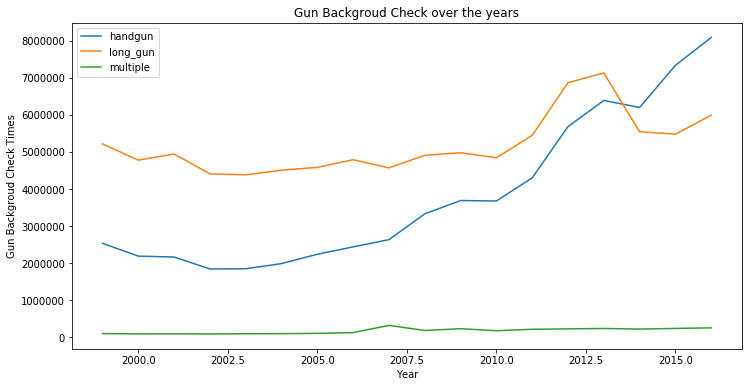

In [47]:

x= df2_year['month']
y=df2_year[['handgun','long_gun','multiple']]
#Call function
plot(x,y)
#Name axis and title
plt.title('Gun Backgroud Check over the years')
plt.xlabel('Year')
plt.ylabel('Gun Backgroud Check Times')


## Is the behaviour of gun uses different in different states in 2016? by How?

### According to the chart below, people have different flavor to guns in different states. In some states,people prefer longgun than hand gun. As we can see from the bar chart, we can see a lot of red area over the purple area because the purple area are the percetage of longgun background check. We found out that in most states people buy handgun more than long gun in 2016. However, there are states longgun are obviously more popular than handgun like Montana, SouthDakota, North Dakota, Iowa, Nebraska and North Carolina. Only a small portion of people would by two kinds of gun at a time in all states.  
### Another point to be noticed, people in New Jersey has the lowest percentage of gun back ground check over population, it seems they are less likely to buy gun compared to other states. South Dakota and Montana have the hightest rate of Gun purchase rate.

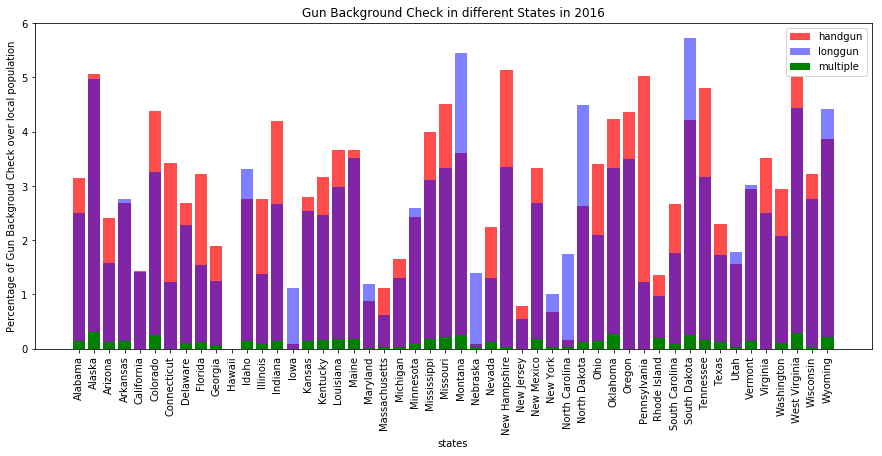

In [51]:
x= df2_new['state']
y_h= percentage_h
y_l = percentage_l
y_m= percentage_m
plt.subplots(figsize=(15,6))
plt.bar(x,y_h,alpha=0.7, color = 'r', label='handgun')
plt.bar(x,y_l,alpha=.5,color = 'b', label='longgun')
plt.bar(x,y_m,alpha=1, color = 'g', label='multiple')
plt.title('Gun Background Check in different States in 2016')
plt.xlabel('states')
plt.ylabel ('Percentage of Gun Backgroud Check over local population')
plt.xticks(rotation='vertical');
plt.legend()

## What is the total sales of difference between the three catogory of gun?

array([0, 1, 2])

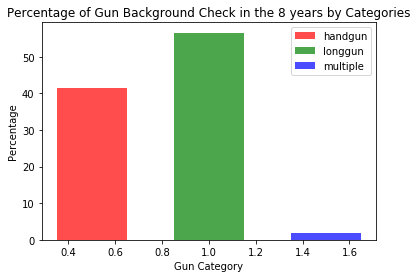

In [69]:
ind = np.arange(len(percentage))  # the x locations for the groups
width = 0.3       # the width of the bars
ind1= ind+width
# plot bars
plt.bar(0.5, percentage.iloc[0], width, color='r', alpha=.7, label='handgun')
plt.bar(1, percentage.iloc[1], width, color='g', alpha=.7, label='longgun')
plt.bar(1.5, percentage.iloc[2], width, color='b', alpha=.7, label='multiple')
# title and labels
plt.ylabel('Percentage')
plt.xlabel('Gun Category')
plt.title('Percentage of Gun Background Check in the 8 years by Categories')

# legend
plt.legend()

### As we can see from the histogram above, the total gun background check of the three categories from 1999 to 2016. The total longgun sale takes the majority part of total gun sales in US, which is more than 50%. The handgun takes a relatively some porttion of it, which is around 40%.  People who buy multiple kinds of gun at a time takes the smalest portion which is less than 5 %.

<a id='conclusions'></a>
## Conclusions
### Limitations: 
   #### Since the data we have is about the background check, it cannot represent the whole picture of US gun transaction. We don't have the data of non-registered firearm purchase. Hence, it can only provide a peak of the whole picture of it. Another limitation is we do have some minor(less than 5%) null value in our data, it may affect our analysis a little bit. 
    
### As a conclusion, it seems short gun are becoming more and more popular over the years, the amount of back ground check quadrupled in 2016 compared to 2002. The long gun buyers increases slowly over the 7 years, it still at 5 million level over U.S. 
### According to the percentage of gun backgound check of each state in 2016, people in most states favor hand gun more than long gun.
### Even though the handgun sales went up dramatically after 2002, the total long gun gun grand check still more than hand gun, which suggests more people buy long gun during the 17 years in US. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0